In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_data(X, y):
    plt.figure(figsize=(8,6))

    for i in y:
        plt.plot(X, y[i])

    plt.title("Thermal Conductance Of Different Optimal Structures")
    plt.ylabel("Thermal Conductance")
    plt.xlabel("Calculated Structures")
    plt.legend()

    plt.show()

In [3]:
def plot_all(L_all, X):
    plt.figure(figsize=(12,10))

    for i in range(len(L_all)):
        plt.plot(X, L_all[i])

    plt.title("Thermal Conductance Of Different Optimal Structures")
    plt.ylabel("Thermal Conductance")
    plt.xlabel("Calculated Structures")
    
    plt.show()

In [4]:
def find_max(y):
    max_so_far = 0
    y_max = []

    for i in list(y):
        if i > max_so_far:
            max_so_far = i
            y_max.append(max_so_far)
        else:
            y_max.append(max_so_far)
    
    return np.array(y_max)

In [5]:
def find_min(y):
    min_so_far = 1000
    y_min = []

    for i in list(y):
        if i < min_so_far:
            min_so_far = i
            y_min.append(min_so_far)
        else:
            y_min.append(min_so_far)
    
    return np.array(y_min)

In [6]:
# Create a dictionary to store experiment results
data_d = {}
for i in range(1, 11):
    data_d["data{0}".format(i)] = np.load('results/Si-Ge_1010_max/results'+str(i)+'.npz')
#data_d['data1'].files

# Set X as calculated number of structures, and y as structures' get_reward value
X = np.arange(1, len(data_d['data1']['fx'])+1, 1)
y_d = {}
for i in range(1,11):
    y_d['y{0}'.format(i)] = data_d['data'+str(i)]['fx']

# Create a dictionary of best-so-far values
y_max = {}
for i in range(1,11):
    y_max['y{0}_max'.format(i)] = find_max(y_d['y'+str(i)])
    

In [7]:
# Create a dictionary to store experiment results
data_d = {}
for i in range(1, 11):
    data_d["data{0}".format(i)] = np.load('results/Si-Ge_1010_min/results'+str(i)+'.npz')

# Set X as calculated number of structures, and y as structures' get_reward value
X = np.arange(1, len(data_d['data1']['fx'])+1, 1)
y_d = {}
for i in range(1,11):
    y_d['y{0}'.format(i)] = data_d['data'+str(i)]['fx']

# Create a dictionary of worst-so-far values
y_min = {}
for i in range(1,11):
    y_min['y{0}_min'.format(i)] = find_min(y_d['y'+str(i)])

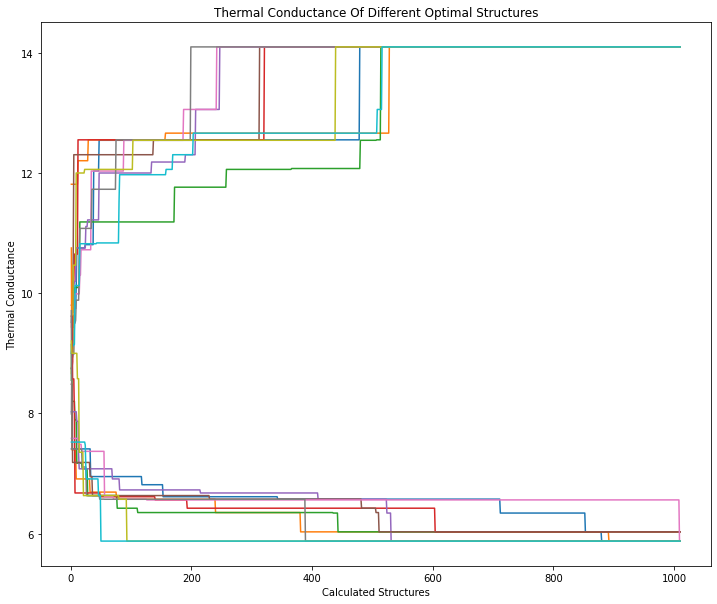

In [8]:
# Plot everything in one graph
L_all = []

for i in y_max.values():
    L_all.append(i)

for i in y_min.values():
    L_all.append(i)

plot_all(L_all, X)